In [1]:
import pandas as pd
from statsmodels.tsa.statespace.sarimax import SARIMAX
import matplotlib.pyplot as plt

## Model Selection: SARIMA

SARIMA, or Seasonal Autoregressive Integrated Moving Average, is an extension of the ARIMA model that specifically includes components for seasonality. The justification for selecting SARIMA for the half-hourly energy demand time series in Victoria, Australia, is as follows:

### Data Characteristics
- **Stationarity**: The Augmented Dickey-Fuller (ADF) test confirmed that the time series is stationary, which is a prerequisite for ARIMA-based models.
- **Seasonality**: The time series decomposition and Fourier analysis revealed clear seasonal patterns, which SARIMA can model with its seasonal parameters.

### Model Capabilities
- **Flexibility**: SARIMA's flexibility allows it to model a broad class of seasonal time series.
- **Seasonal Parameters**: It includes seasonal autoregressive (P), differencing (D), and moving average (Q) parameters along with a period (s) parameter to explicitly model the seasonality observed in the data.
- **Interpretability**: SARIMA models provide interpretable parameters that correspond to the data's autocorrelations and partial autocorrelations, making them favorable for understanding the driving forces behind the time series.

### Predictive Performance
- **Accuracy**: SARIMA models are known for their accuracy in forecasting time series data with seasonal patterns.
- **Adaptability**: They can be tuned to adapt to changes in the time series' structure over time, accommodating evolving trends and seasonal effects.

Given these points, SARIMA is a well-suited model for forecasting the energy demand time series and will be the primary focus in the next phase of our analysis.


In [2]:
vic_data = pd.read_csv("vic_data.csv")

 This problem is unconstrained.


RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =            1     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  5.73369D+00    |proj g|=  2.83498D-06

           * * *

Tit   = total number of iterations
Tnf   = total number of function evaluations
Tnint = total number of segments explored during Cauchy searches
Skip  = number of BFGS updates skipped
Nact  = number of active bounds at final generalized Cauchy point
Projg = norm of the final projected gradient
F     = final function value

           * * *

   N    Tit     Tnf  Tnint  Skip  Nact     Projg        F
    1      0      1      0     0     0   2.835D-06   5.734D+00
  F =   5.7336932791330524     

CONVERGENCE: NORM_OF_PROJECTED_GRADIENT_<=_PGTOL            
                                     SARIMAX Results                                      
Dep. Variable:                             demand   No. Observations:               230736
Model:      

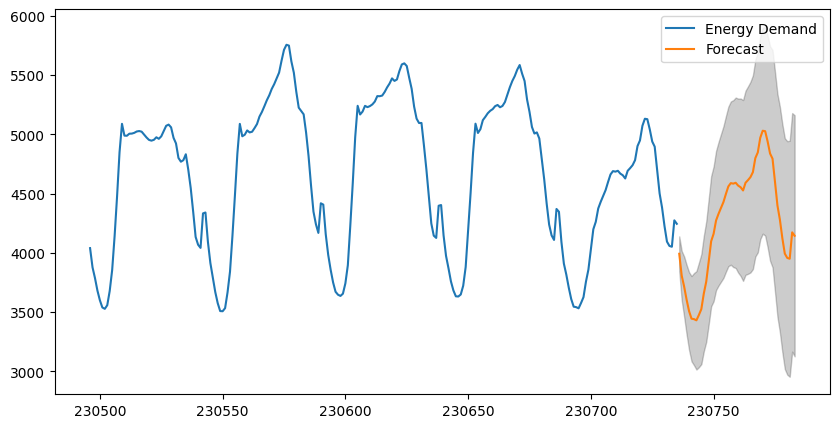

In [3]:

# Make sure vic_data is loaded correctly and there are no missing values
vic_data.dropna(inplace=True)

# Simplify the model for initial testing
simple_order = (0, 1, 0)
simple_seasonal_order = (0, 1, 0, 48)

# Initialize and fit the model
sarima_model = SARIMAX(vic_data['demand'], order=simple_order, seasonal_order=simple_seasonal_order)
sarima_result = sarima_model.fit(maxiter=200, method='lbfgs', disp=True)

# Print the summary
print(sarima_result.summary())

# Forecasting
n_periods = 48
forecast = sarima_result.get_forecast(steps=n_periods)
forecast_df = forecast.conf_int()
forecast_df['Forecast'] = forecast.predicted_mean

# Plot the forecast alongside the data
plt.figure(figsize=(10, 5))
plt.plot(vic_data['demand'].iloc[-n_periods * 5:], label='Energy Demand')  # Plot a subset for clarity
plt.plot(forecast_df['Forecast'], label='Forecast')
plt.fill_between(forecast_df.index,
                 forecast_df.iloc[:, 0],
                 forecast_df.iloc[:, 1], color='k', alpha=0.2)
plt.legend()
plt.show()

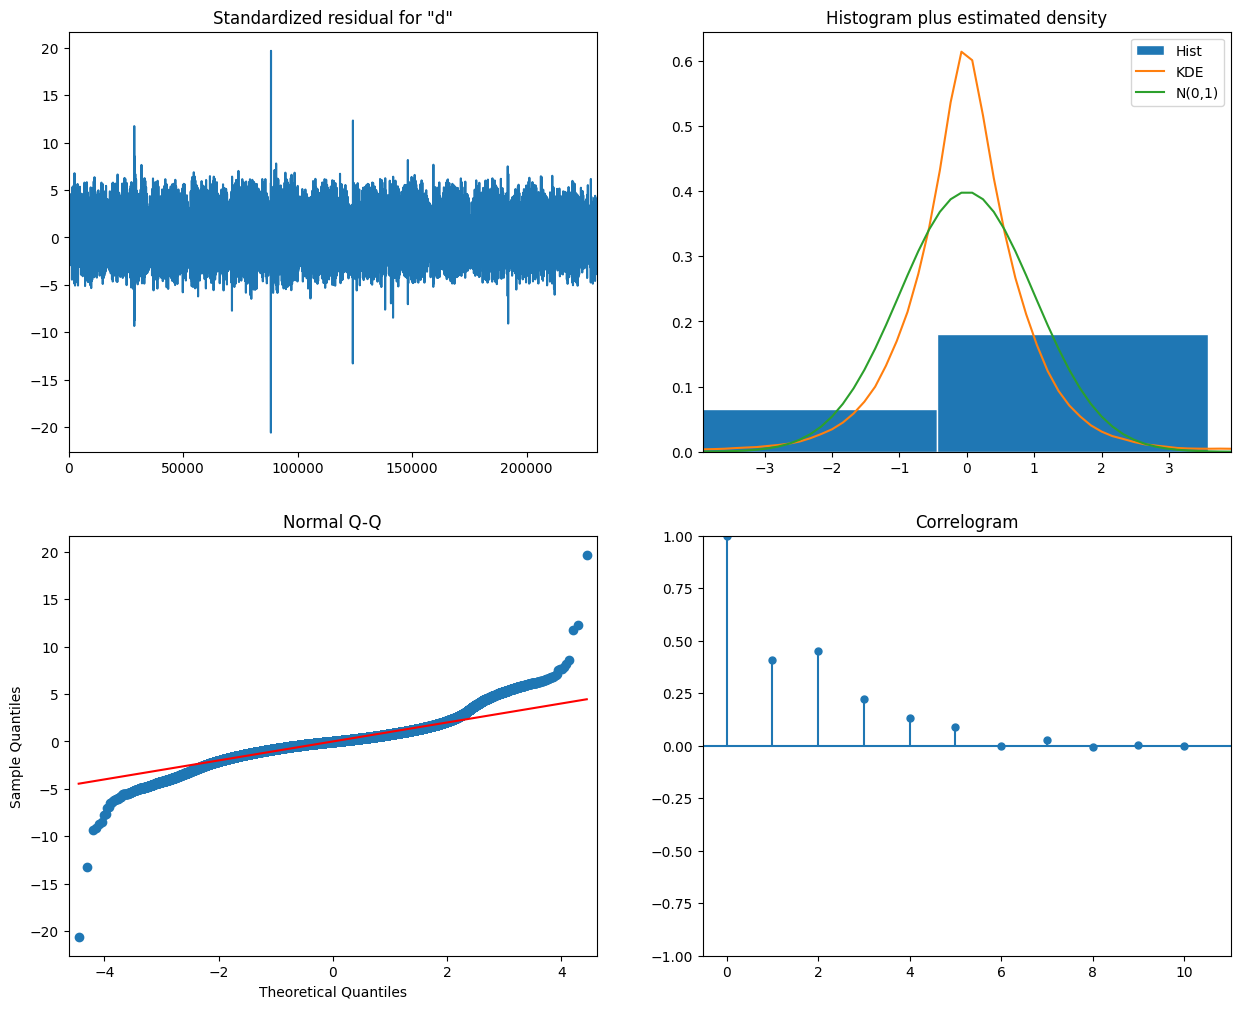

In [4]:
sarima_result.plot_diagnostics(figsize=(15, 12))
plt.show()